In [108]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import librosa
import librosa.display

import scipy.signal as signal
from scipy.signal import butter
from scipy.signal import lfilter
from scipy.signal import freqz;

In [109]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='highpass', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y;

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


## Spirometry Data

Total files in the directory =  48
True PEF = 5.89
True FVC = 3.97


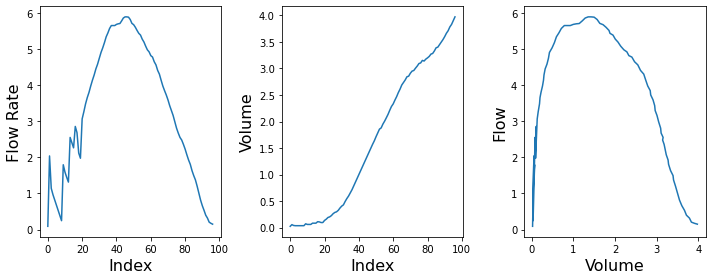

In [120]:
print("Total files in the directory = ",len(os.listdir('images')))
df = pd.read_csv("csv/11_Dipan.csv",names=['VT','FV'])
fig,ax = plt.subplots(1,3,figsize=(10,4))

ax[0].plot(df['FV'])
ax[0].set_xlabel('Index', fontsize=16)
ax[0].set_ylabel('Flow Rate', fontsize=16)
ax[1].plot(df['VT'])
ax[1].set_xlabel('Index', fontsize=16)
ax[1].set_ylabel('Volume', fontsize=16)
ax[2].plot(df['VT'],df['FV'])
ax[2].set_xlabel('Volume', fontsize=16)
ax[2].set_ylabel('Flow', fontsize=16)
fig.tight_layout()
#df.plot()
print("True PEF = {:.2f}".format(GTfileName['FV'].max()))
print("True FVC = {:.2f}".format(GTfileName['VT'][-1:].values[0]))

## Audio Data

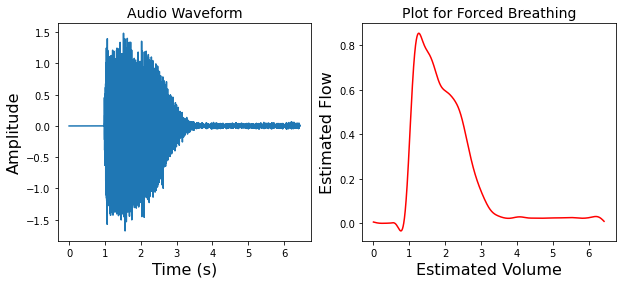

In [113]:
x, fs = librosa.load('spiromask-export/forced-breathing/Forced Breathing.P11.FVC_N95.2b66msvi.wav.362e97ve.ingestion-d87bc5cdc-rtf9x.wav', sr=16000)
t = np.arange(0,len(x))/fs
cutoff_low = 50 # desired cutoff frequency of the filter, Hz
cutoff_high = 1500
order = 4

#x_filt = butter_highpass_filter(x, cutoff, fs, order)
x_filt = butter_bandpass_filter(x,cutoff_low,cutoff_high,fs,order)
x_filt_hilbert = signal.hilbert(x_filt)
envelope_hat = np.abs(x_filt_hilbert)
#filter the Hilbert envelope
nyq_rate = fs /0.5
width = 1.0/nyq_rate # 5 Hz filter transition width.
ripple_db = 10.0 # stop band attenuation
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
t = np.arange(0,len(envelope_hat_filt))/fs

fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(t,x_filt)
ax[0].set_xlabel('Time (s)', fontsize=16)
ax[0].set_ylabel('Amplitude', fontsize=16)
ax[0].set_title('Audio Waveform',fontsize=14)
ax[0].grid(False)

ax[1].plot(t,envelope_hat_filt,'r')
ax[1].set_xlabel('Estimated Volume', fontsize=16)
ax[1].set_ylabel('Estimated Flow', fontsize=16)
ax[1].set_title('Plot for {}'.format(file.split('.')[0]),fontsize=14)
ax[1].grid(False)

In [69]:
#list the audio files and extract the participant ID for all
#save the participant ID in a list
audioFiles = os.listdir('spiromask-export/forced-breathing/')
participantID = []
for file in audioFiles:
    try:
        if file.split('.')[2] == 'FVC_N95':
            count+=1
            participantID.append(int(file.split('.')[1][1:]))
    except:
        pass

#for all helios images, check if corresponding audio file is available
heliosImageFiles = os.listdir('images/')

count = 0
for image in heliosImageFiles:
    if image[:2][1] == '_': 
        if int(image[:1]) in participantID:
            print("Participant ID {}, Corresponding audio file found".format(int(image[:1])))
        else:
            print("No")
    else:
        if int(image[:2]) in participantID:
            print("Participant ID {}, Corresponding audio file found".format(int(image[:2])))
        else:
            print("No")
    count+=1
print("Total Participants = ",count)
    

Participant ID 28, Corresponding audio file found
Participant ID 53, Corresponding audio file found
Participant ID 4, Corresponding audio file found
Participant ID 5, Corresponding audio file found
Participant ID 51, Corresponding audio file found
Participant ID 34, Corresponding audio file found
Participant ID 33, Corresponding audio file found
Participant ID 36, Corresponding audio file found
Participant ID 35, Corresponding audio file found
Participant ID 10, Corresponding audio file found
Participant ID 0, Corresponding audio file found
Participant ID 27, Corresponding audio file found
Participant ID 37, Corresponding audio file found
Participant ID 13, Corresponding audio file found
Participant ID 40, Corresponding audio file found
Participant ID 50, Corresponding audio file found
Participant ID 22, Corresponding audio file found
Participant ID 50, Corresponding audio file found
Participant ID 3, Corresponding audio file found
Participant ID 26, Corresponding audio file found
Part

## Extracting Ground Truth Lungh Health Parameters

True PEF = 5.89
True FVC = 3.97


<AxesSubplot:>

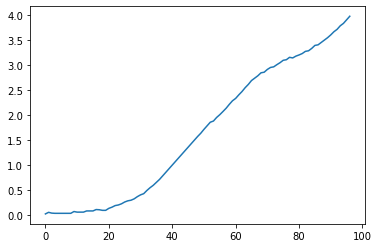

In [100]:
GTfileName = pd.read_csv("csv/11_Dipan.csv",names=['VT','FV'])

print("True PEF = {:.2f}".format(GTfileName['FV'].max()))
print("True FVC = {:.2f}".format(GTfileName['VT'][-1:].values[0]))


GTfileName['VT'].plot()

In [99]:
GTfileName['VT'][-1:].values[0]

3.973692452239274

In [87]:
np.cumsum(GTfileName['FV'])

0       0.089184
1       2.129243
2       3.271980
3       4.238457
4       5.060721
         ...    
92    322.605313
93    322.922834
94    323.128189
95    323.301497
96    323.450770
Name: FV, Length: 97, dtype: float64

<AxesSubplot:>

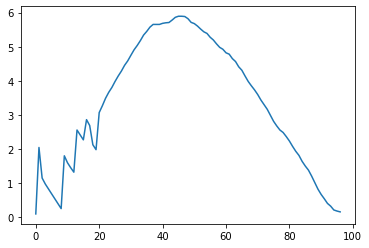

In [88]:
GTfileName['FV'].plot()